In [21]:
proportional_train_matrix = '/home/aaanpilov/diploma/project/numpy_matrixes/ranks_matrix/proportional/raw_HC/auc.npy'
proportional_test_matrix = '/home/aaanpilov/diploma/project/numpy_matrixes/ranks_matrix/proportional/raw_test/auc.npy'

reduced_train_matrix = '/home/aaanpilov/diploma/project/numpy_matrixes/ranks_matrix/reduced_ranks/auc_raw_HC.npy'
reduced_test_matrix = '/home/aaanpilov/diploma/project/numpy_matrixes/ranks_matrix/reduced_ranks/auc_test.npy'

ranks_train_matrix = '/home/aaanpilov/diploma/project/numpy_matrixes/ranks_matrix/raw_HC/auc.npy'
ranks_test_matrix = '/home/aaanpilov/diploma/project/numpy_matrixes/ranks_matrix/raw_test/auc.npy'


train_matrix = ranks_train_matrix
test_matrix = ranks_test_matrix

# train_matrix = reduced_train_matrix
# test_matrix = reduced_test_matrix

# train_matrix = proportional_train_matrix
# test_matrix = proportional_test_matrix 

# train_matrix, test_matrix = test_matrix, train_matrix

In [22]:
import numpy as np

matrix = np.load(train_matrix)
N = matrix.shape[0]  # Длина массива
sub_num = N // 5    # Количество испытуемых

labels = np.zeros(N, dtype=int)  # Создаем массив из нулей
labels[3::5] = 1  # Каждый 4-й элемен
print(matrix.shape)

X = matrix
y = labels

(85, 132)


In [23]:
from sklearn.model_selection import GroupShuffleSplit

# Группы для разделения
groups = np.repeat(np.arange(sub_num), 5)  # [0,0,0,0,0, 1,1,1,1,1,...]

splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=30)
train_idx, test_idx = next(splitter.split(X, y, groups))

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print(y_test)

[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
from sklearn.model_selection import GroupKFold

from sklearn.model_selection import LeaveOneGroupOut
models = {
    # "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    # "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    # "SVM": SVC(kernel='linear', class_weight='balanced', probability=True),
    "XGBoost": XGBClassifier(scale_pos_weight=4)  # Вес для класса 1: 68/17 = 4
}

# Создаем GroupKFold (например, 5 фолдов)
logo = LeaveOneGroupOut()
scores = []

for name, model in models.items():
    scores = []
    for train_idx, val_idx in logo.split(X, y, groups):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

        # print(f"{name}")
        print(classification_report(y_val, y_pred))
        print("ROC-AUC:", roc_auc_score(y_val, y_proba))

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# model = XGBClassifier(scale_pos_weight=1)  # Теперь классы сбалансированы SMOTE
# model.fit(X_train_smote, y_train_smote)
# y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)[:, 1]

# print(classification_report(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# model = models["XGBoost"]

# # for name, model in models.items():
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)[:, 1]

# # print(f"{name}")
# print(classification_report(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_proba))

/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaanpilov/.local/lib/pyth

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

ROC-AUC: 0.75
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60    

/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00     

/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaanpilov/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aaanpilov/.local/lib/pyth

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00     

In [27]:
matrix_test = np.load(test_matrix)
N_test = matrix_test.shape[0]  # Длина массива
sub_num_test = N_test // 5

labels_test = np.zeros(N_test, dtype=int)  # Создаем массив из нулей
labels_test[3::5] = 1  # Каждый 4-й элемен
print(classification_report(labels_test, model.predict(matrix_test)))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        40
           1       0.75      0.30      0.43        10

    accuracy                           0.84        50
   macro avg       0.80      0.64      0.67        50
weighted avg       0.83      0.84      0.81        50



In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
def visualize(data):
# Создаем тепловую карту
    plt.figure(figsize=(10, 6))  # Задаем размер графика
    sns.heatmap(data, cmap='viridis', cbar_kws={'label': 'Значения'})  # 'viridis' — цветовая карта
    plt.title('Тепловая карта')
    plt.xlabel('Регионы')
    plt.ylabel('Стимулы')
    plt.show()


0
[1 0 0 0 1]


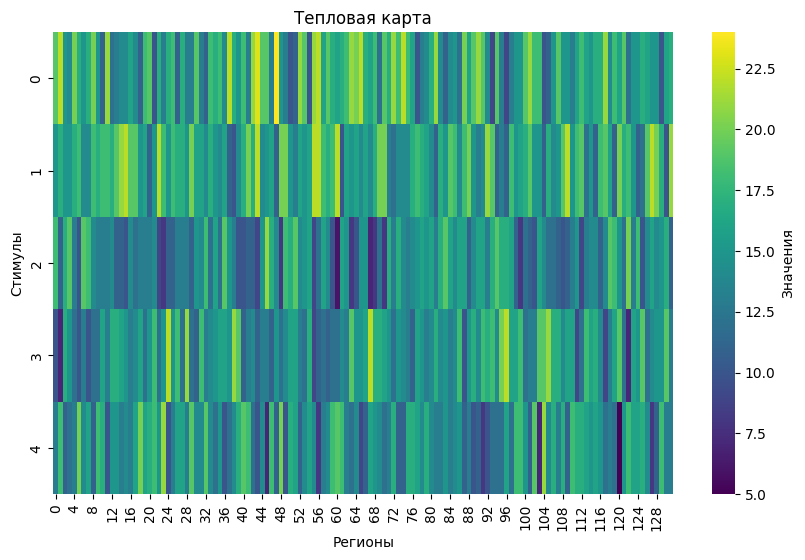

1
[0 0 0 1 0]


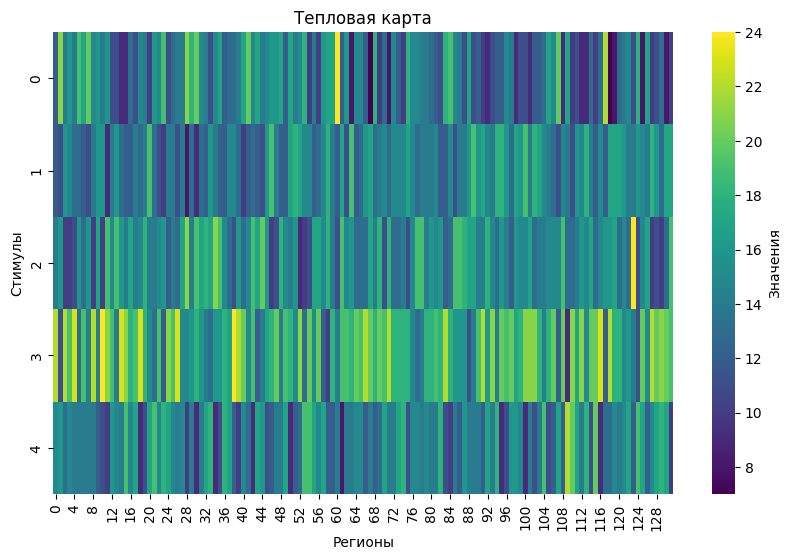

2
[1 0 0 1 0]


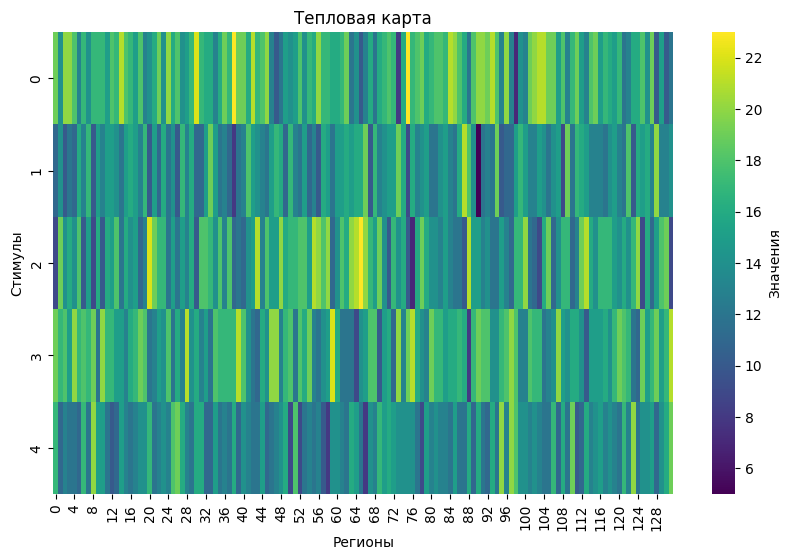

3
[1 1 0 0 0]


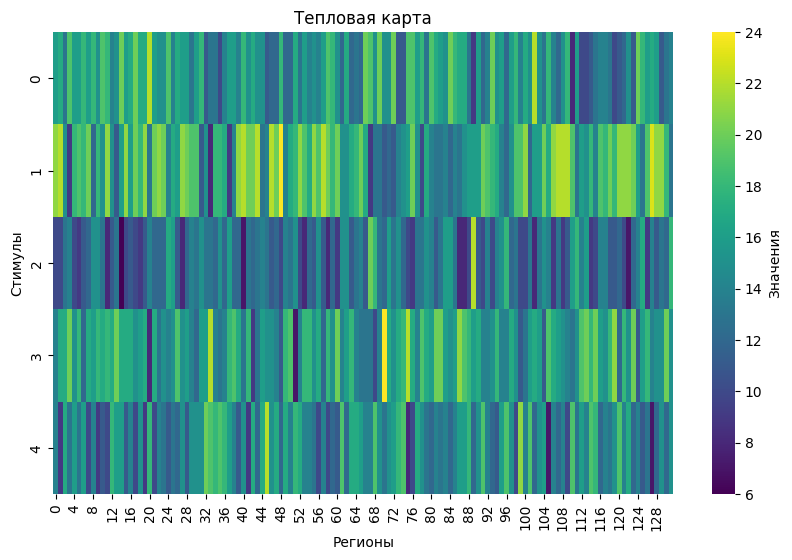

4
[0 0 0 0 0]


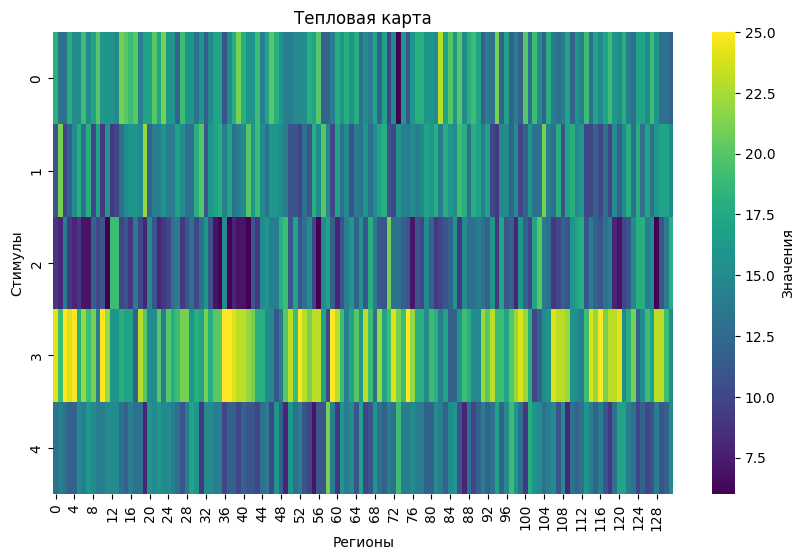

5
[0 0 0 0 0]


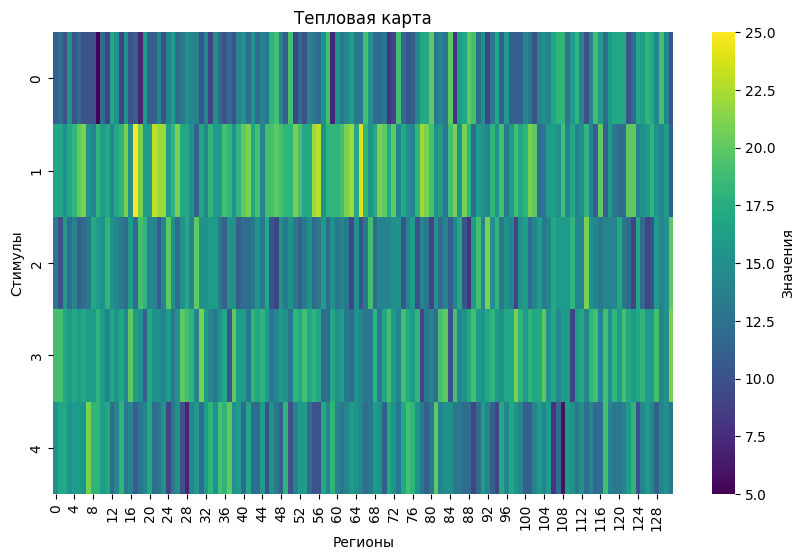

6
[0 0 0 0 0]


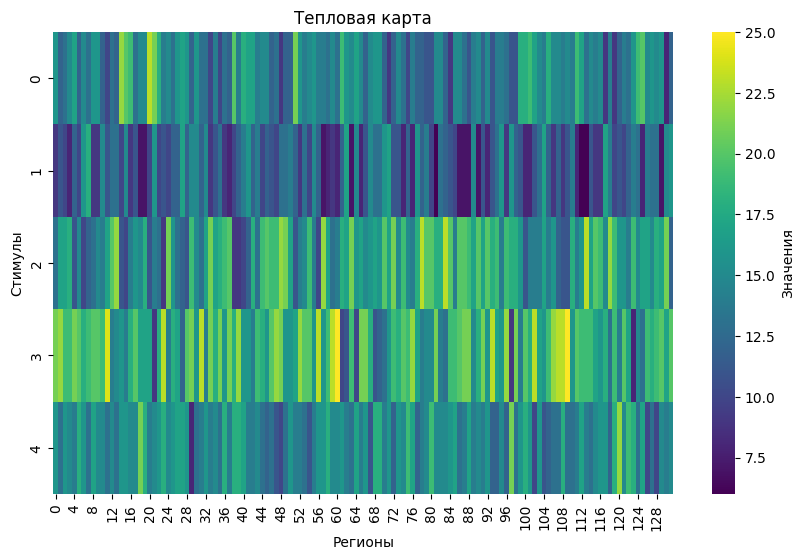

7
[0 0 0 1 0]


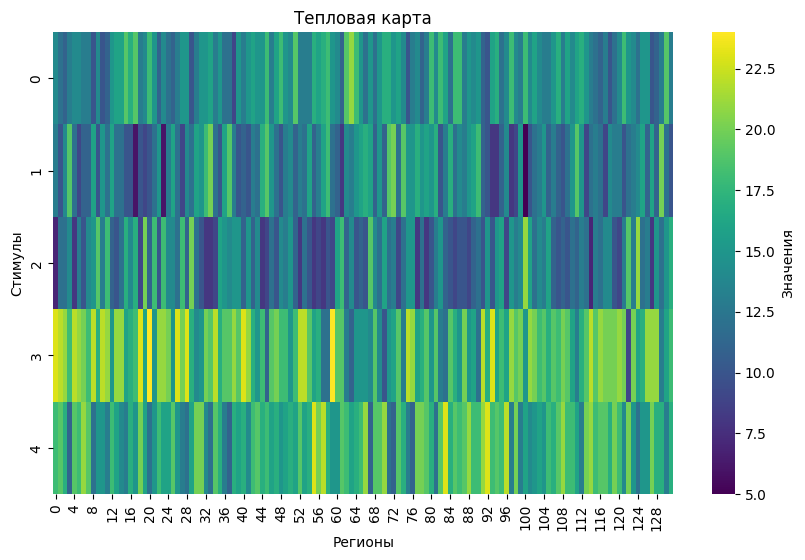

8
[0 0 0 1 0]


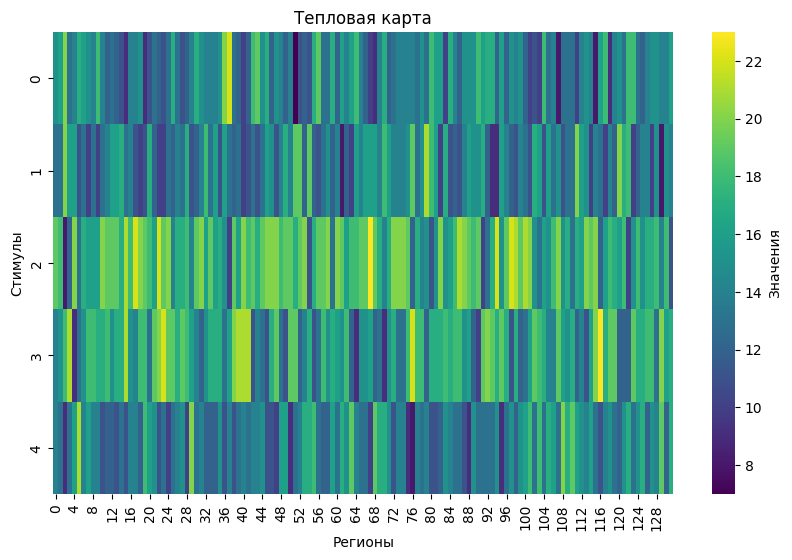

9
[0 0 0 0 0]


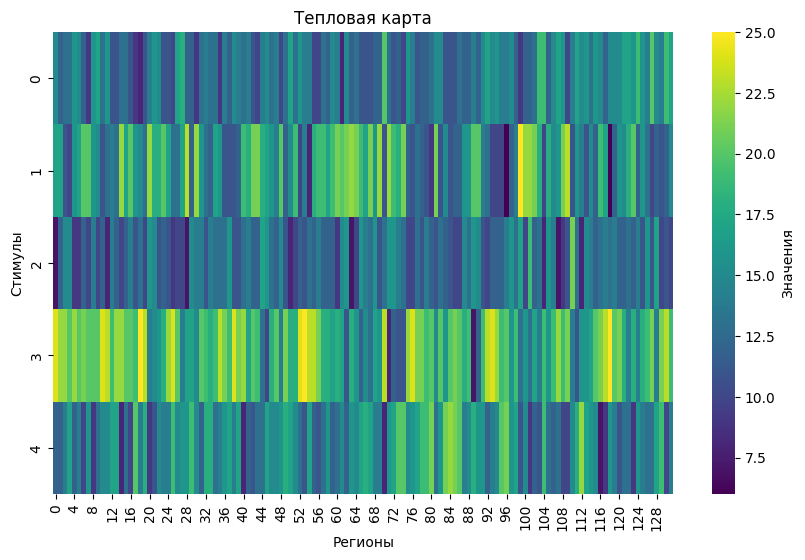

10
[0 0 0 0 0]


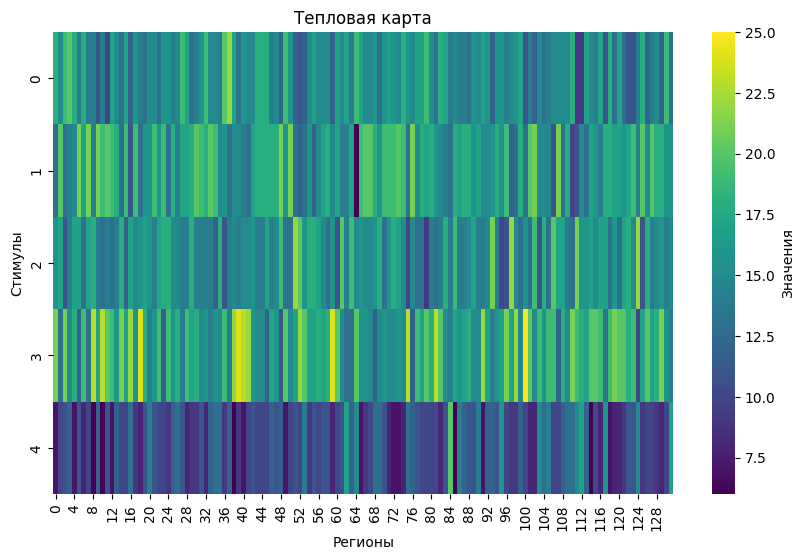

11
[0 0 0 0 0]


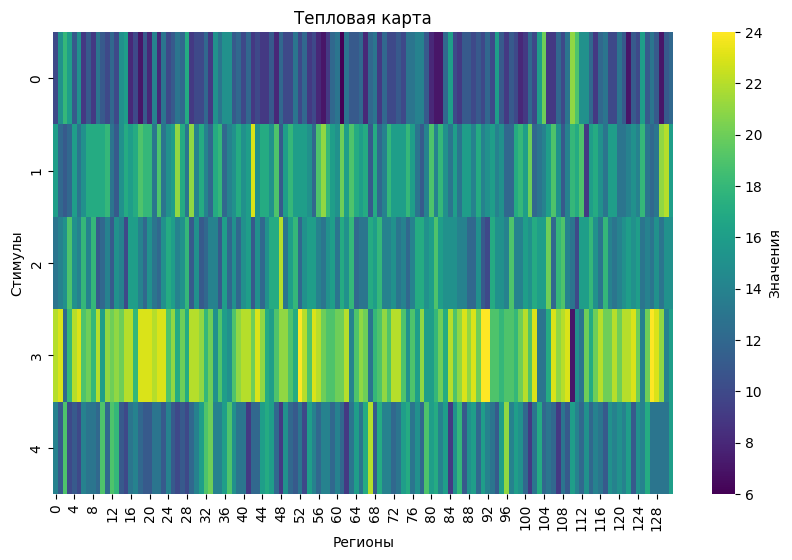

12
[0 0 0 0 1]


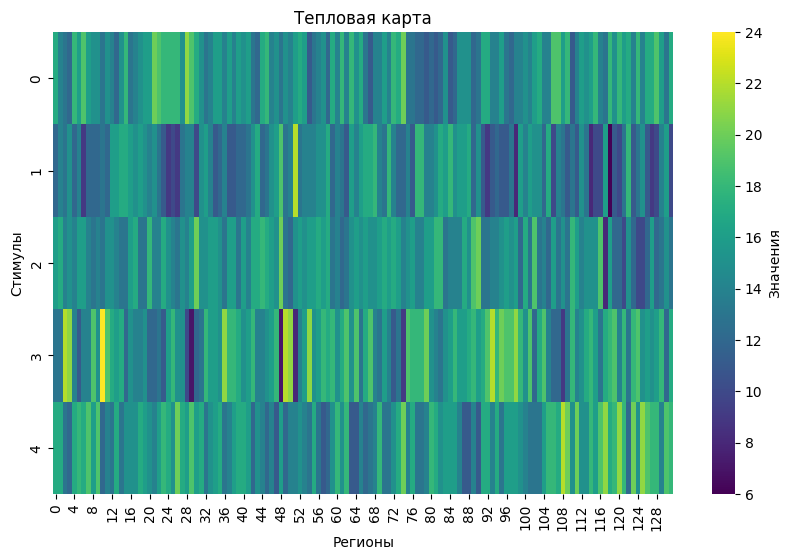

13
[0 0 0 0 0]


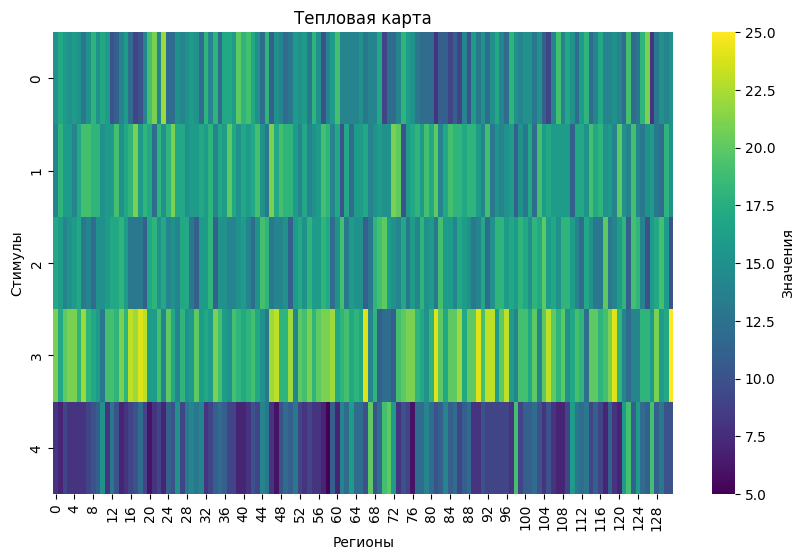

14
[1 0 0 0 0]


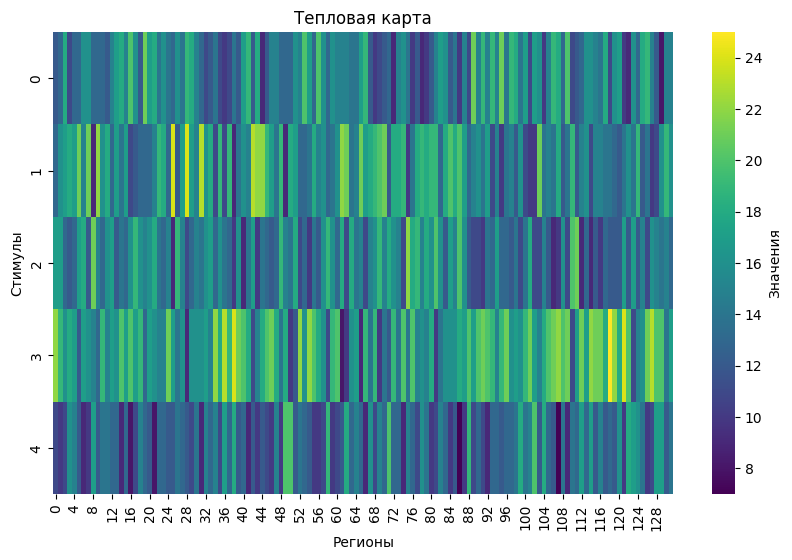

15
[0 0 0 1 0]


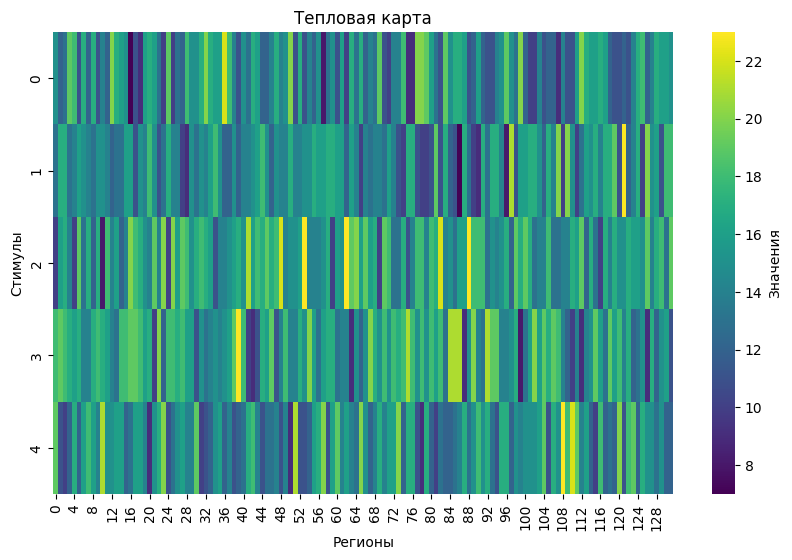

16
[0 0 0 0 0]


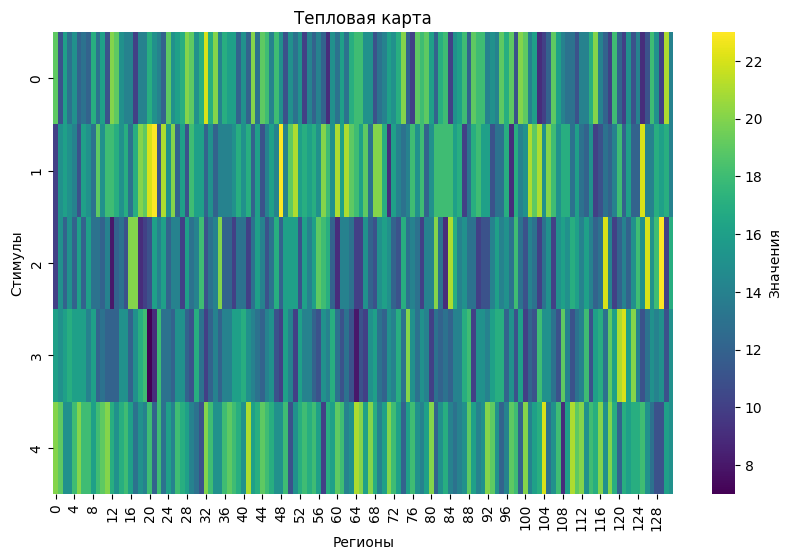

In [7]:
subjects = np.array_split(matrix_test, sub_num_test)
predict_labels = np.array_split(model.predict(matrix_test), sub_num_test)
for idx, sub in enumerate(subjects):
    print(idx)
    print(predict_labels[idx])
    visualize(subjects[idx])

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# 1. Подготовка данных (если X_train — массив, а не DataFrame)
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=[f'region_{i}' for i in range(0, 132)])
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=[f'region_{i}' for i in range(0, 132)])

# 2. Первое обучение (чтобы определить важные регионы)
model = XGBClassifier(scale_pos_weight=4, random_state=42)
model.fit(X_train, y_train)

# 3. Получаем важность регионов (по gain)
importance = model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Region': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values('Importance', ascending=False)

# 4. Выбираем топ-20 регионов
top_regions = importance_df.head(20)['Region'].tolist()
print("🔝 Топ-20 важных регионов:", top_regions)

# 5. Обрезаем данные, оставляя только топ-20
X_train_top = X_train[top_regions]
X_test_top = X_test[top_regions]

# 6. Переобучаем XGBoost на урезанных данных
model_top = XGBClassifier(scale_pos_weight=4, random_state=42)
model_top.fit(X_train_top, y_train)

# 7. Проверяем качество на тестовых данных
y_pred_top = model_top.predict(X_test_top)
y_proba_top = model_top.predict_proba(X_test_top)[:, 1]

print("\n📊 Отчет по классификации (топ-20 регионов):")
print(classification_report(y_test, y_pred_top))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_top))

🔝 Топ-20 важных регионов: ['region_38', 'region_103', 'region_76', 'region_59', 'region_3', 'region_95', 'region_26', 'region_7', 'region_75', 'region_118', 'region_98', 'region_69', 'region_48', 'region_125', 'region_21', 'region_122', 'region_96', 'region_126', 'region_124', 'region_0']

📊 Отчет по классификации (топ-20 регионов):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

ROC-AUC: 1.0
